# **Project Title: Online Retail EDA Project**

**Author:** Bandi Purna Shekhar

**Date:** 24-Oct-2025  

---

## **Step 1: Project Setup**
In this step, we will set up our environment, install necessary libraries, and load the Online Retail dataset for analysis.


In [3]:
# Install required libraries (uncomment if not already installed)
# !pip install pandas numpy matplotlib seaborn plotly

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")


### **Load Dataset**
We will load the Online Retail dataset and assign column names for better readability.


In [4]:
# Define column names
column_names = [
    'Invoice',
    'StockCode',
    'Description',
    'Quantity',
    'InvoiceDate',
    'UnitPrice',
    'CustomerID',
    'Country'
]

# Load dataset
online_retail_df = pd.read_csv('/content/online_retail_ii_UCI_data_set.csv',
                               header=None,
                               names=column_names)

# Preview first 5 rows
online_retail_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


### **Summary**
- Dataset is successfully loaded with meaningful column names.
- Ready for **Exploratory Data Analysis (EDA)**.
- Next step: **Data Understanding** (checking data types, missing values, and basic statistics).


## **Step 2: Data Understanding**

In this step, we will explore the dataset to understand its structure, types of features, and basic statistics. This helps in planning the cleaning and analysis steps.


In [5]:
# Check the shape of the dataset
print("Dataset Shape:", online_retail_df.shape)


Dataset Shape: (1048575, 8)


In [6]:
# Check basic info and datatypes
online_retail_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   UnitPrice    1048575 non-null  float64
 6   CustomerID   811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [7]:
# Preview first few rows
online_retail_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [8]:
# Check for missing values in each column
missing_values = online_retail_df.isnull().sum()
missing_values


,0
Invoice,0
StockCode,0
Description,4372
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,236682
Country,0


In [9]:
# Check for duplicate rows
duplicate_count = online_retail_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 34150


### **Identify Feature Types**

- **Numerical Features:** `Quantity`, `UnitPrice`  
- **Categorical Features:** `Invoice`, `StockCode`, `Description`, `Country`  
- **Datetime Feature:** `InvoiceDate` (currently object type)  

This helps us decide which columns need cleaning, encoding, or type conversion.


In [10]:
# Convert 'InvoiceDate' to datetime type
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'], dayfirst=True)

# Check the data types after conversion
online_retail_df.dtypes


,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


### **Step 2 Summary**

- Dataset contains **1,048,575 rows and 8 columns**.  
- **Missing values**:
  - `Description` → 4,372 missing
  - `CustomerID` → 236,682 missing
- **Data types**:
  - Categorical/Text: `Invoice`, `StockCode`, `Description`, `Country`
  - Numerical: `Quantity`, `UnitPrice`, `CustomerID`
  - Datetime: `InvoiceDate` (converted successfully)
- **Duplicates**: Checked (will handle in next step)  
- Next step: **Step 3 - Data Cleaning**


## **Step 3: Data Cleaning**

In this step, we will clean the dataset by handling missing values, removing duplicates, and ensuring correct data types. This prepares the data for analysis.


In [11]:
# Fill missing values
online_retail_df['Description'] = online_retail_df['Description'].fillna('None')
online_retail_df['CustomerID'] = online_retail_df['CustomerID'].fillna('Guest')

# Verify missing values are handled
online_retail_df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [12]:
# Check for duplicate rows
print("Number of duplicate rows before removal:", online_retail_df.duplicated().sum())

# Remove duplicates
online_retail_df = online_retail_df.drop_duplicates()

# Verify duplicates are removed
print("Number of duplicate rows after removal:", online_retail_df.duplicated().sum())


Number of duplicate rows before removal: 34150
Number of duplicate rows after removal: 0


In [13]:
# Convert CustomerID to string, since we added 'Guest'
online_retail_df['CustomerID'] = online_retail_df['CustomerID'].astype(str)

# Verify data types
online_retail_df.dtypes


,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


### **Step 3 Summary**

- Missing values handled:
  - `Description` → filled with `"None"`  
  - `CustomerID` → filled with `"Guest"`  
- Duplicate rows removed.  
- `CustomerID` converted to **string** to accommodate guest customers.  
- Dataset is now clean and ready for **Step 4: Univariate Analysis**.


In [14]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014425 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1014425 non-null  object        
 1   StockCode    1014425 non-null  object        
 2   Description  1014425 non-null  object        
 3   Quantity     1014425 non-null  int64         
 4   InvoiceDate  1014425 non-null  datetime64[ns]
 5   UnitPrice    1014425 non-null  float64       
 6   CustomerID   1014425 non-null  object        
 7   Country      1014425 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 69.7+ MB


## **EDA Questions**

Before diving into analysis, here are the key questions we aim to answer:

1. How are the `Quantity` values distributed? Are there negative or extremely high quantities?
2. What is the distribution of `UnitPrice`? Which products generate the highest revenue (`Quantity × UnitPrice`)?
3. How many unique customers are there? Who are the top customers by total purchases?
4. Which `StockCode` or `Description` products are sold the most?
5. How does sales vary across different countries? Which countries contribute the most to revenue?
6. Are there seasonal trends in sales? How does `InvoiceDate` affect sales (monthly or daily patterns)?
7. Are there missing values or unusual entries that could affect analysis, such as `CustomerID = Guest` or negative `Quantity`?


## **Step 4: Univariate Analysis**

In this step, we analyze individual features to understand their distribution and identify patterns or anomalies.


1. Quantity Distribution

In [15]:
# Summary statistics
online_retail_df['Quantity'].describe()


,Quantity
count,1.014425e+06
mean,1.009725e+01
std,1.352799e+02
min,-7.421500e+04
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,7.421500e+04


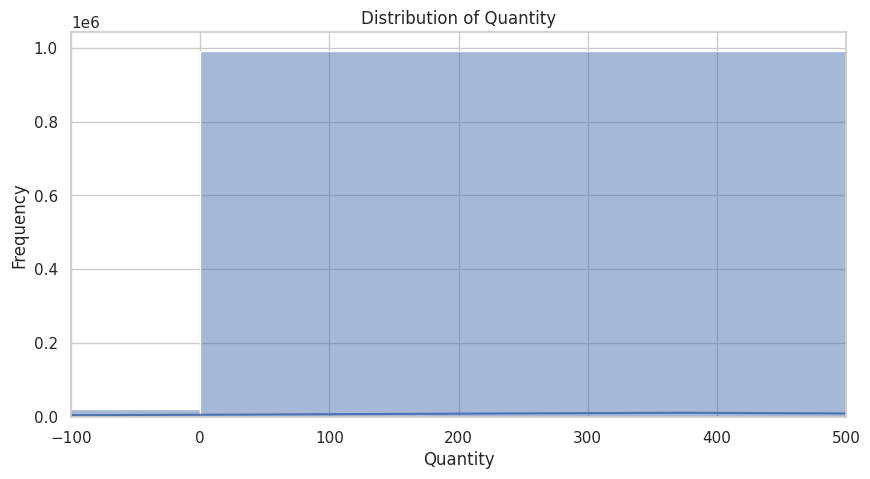

In [16]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(online_retail_df['Quantity'], bins=50, kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.xlim(-100, 500)  # limit x-axis to focus on main distribution
plt.show()



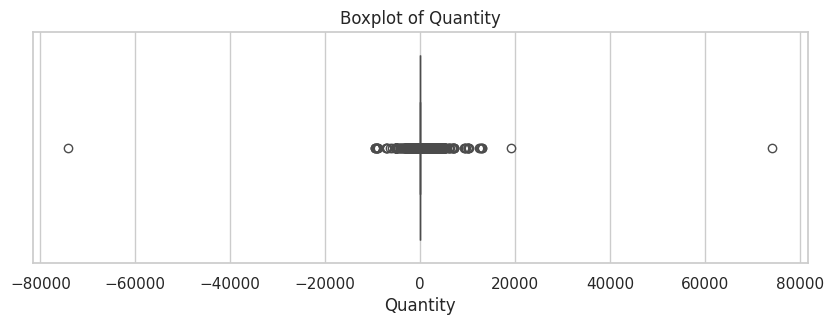

In [17]:

# Boxplot to detect outliers
plt.figure(figsize=(10,3))
sns.boxplot(x=online_retail_df['Quantity'])
plt.title("Boxplot of Quantity")
plt.show()

2. UnitPrice Distribution

In [18]:
# Summary statistics
online_retail_df['UnitPrice'].describe()


,UnitPrice
count,1.014425e+06
mean,4.590115e+00
std,1.215813e+02
min,-5.359436e+04
25%,1.250000e+00
50%,2.100000e+00
75%,4.150000e+00
max,3.897000e+04


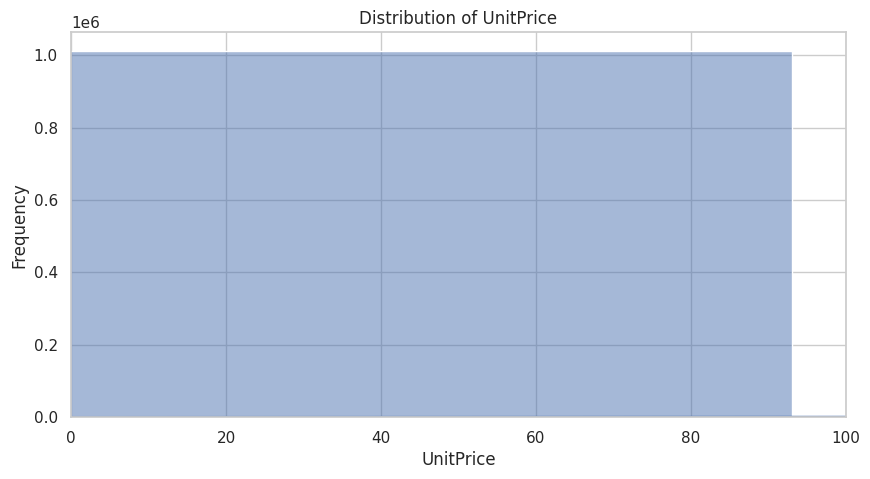

In [19]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(online_retail_df['UnitPrice'], bins=50, kde=True)
plt.title("Distribution of UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # focus on main range
plt.show()

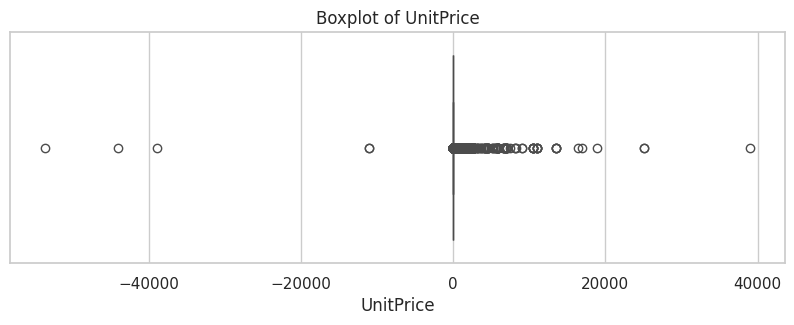

In [20]:
# Boxplot
plt.figure(figsize=(10,3))
sns.boxplot(x=online_retail_df['UnitPrice'])
plt.title("Boxplot of UnitPrice")
plt.show()

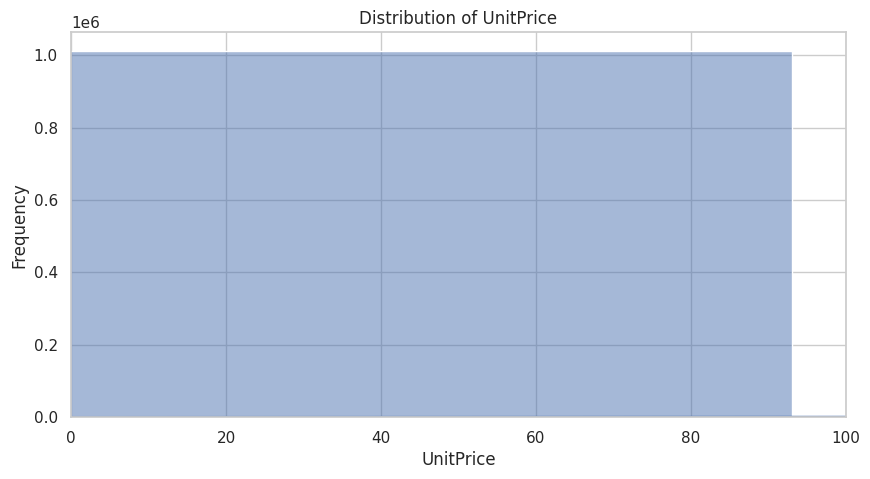

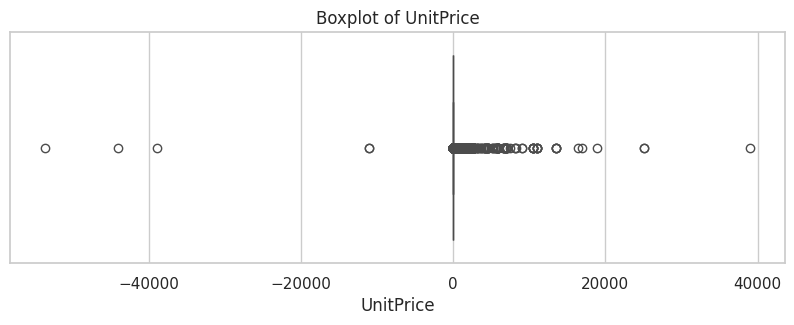

In [21]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(online_retail_df['UnitPrice'], bins=50, kde=True)
plt.title("Distribution of UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # focus on main range
plt.show()

# Boxplot
plt.figure(figsize=(10,3))
sns.boxplot(x=online_retail_df['UnitPrice'])
plt.title("Boxplot of UnitPrice")
plt.show()


3. Description / Product Counts

In [22]:
# Top 10 products by number of transactions
top_products = online_retail_df['Description'].value_counts().head(10)
top_products


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,5697
None,4265
REGENCY CAKESTAND 3 TIER,4248
JUMBO BAG RED RETROSPOT,3345
ASSORTED COLOUR BIRD ORNAMENT,2838
PARTY BUNTING,2711
STRAWBERRY CERAMIC TRINKET BOX,2534
LUNCH BAG BLACK SKULL.,2416
JUMBO STORAGE BAG SUKI,2359


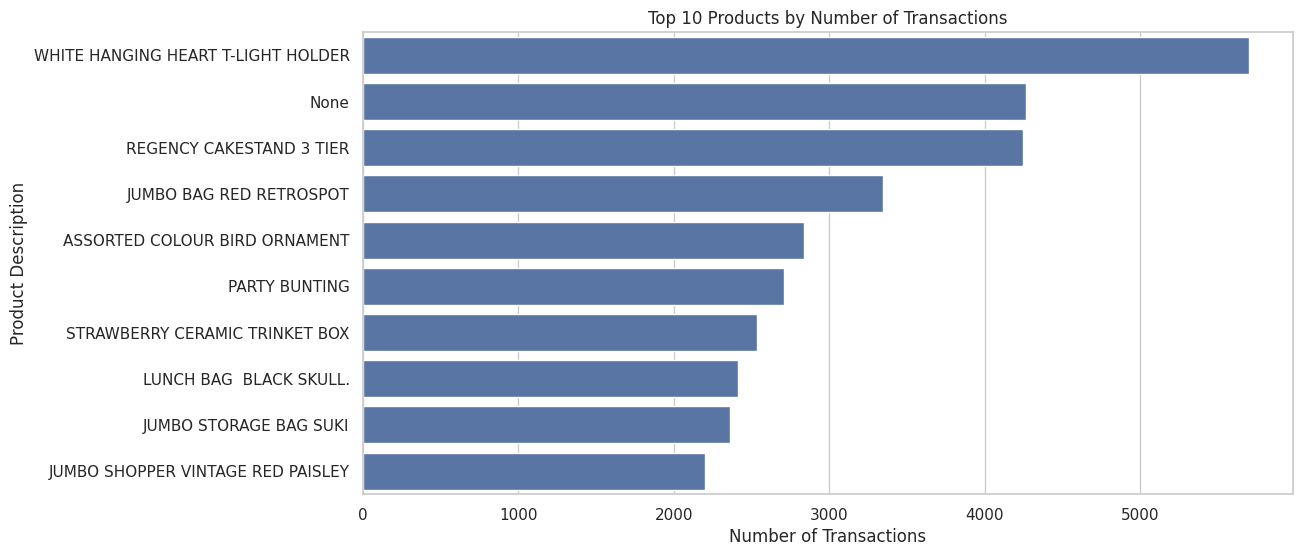

In [23]:
# Bar plot of top 10 products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Description")
plt.show()


4. Customer Activity

In [24]:
# Number of unique customers
num_customers = online_retail_df['CustomerID'].nunique()
print("Number of unique customers:", num_customers)


Number of unique customers: 5925


In [25]:
# Top 10 customers by total Quantity purchased
top_customers = online_retail_df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_customers


,Quantity
CustomerID,
14646.0,357262
Guest,335392
13902.0,218090
13694.0,182094
18102.0,177717
14156.0,162245
14911.0,138193
17511.0,108234
14298.0,100176


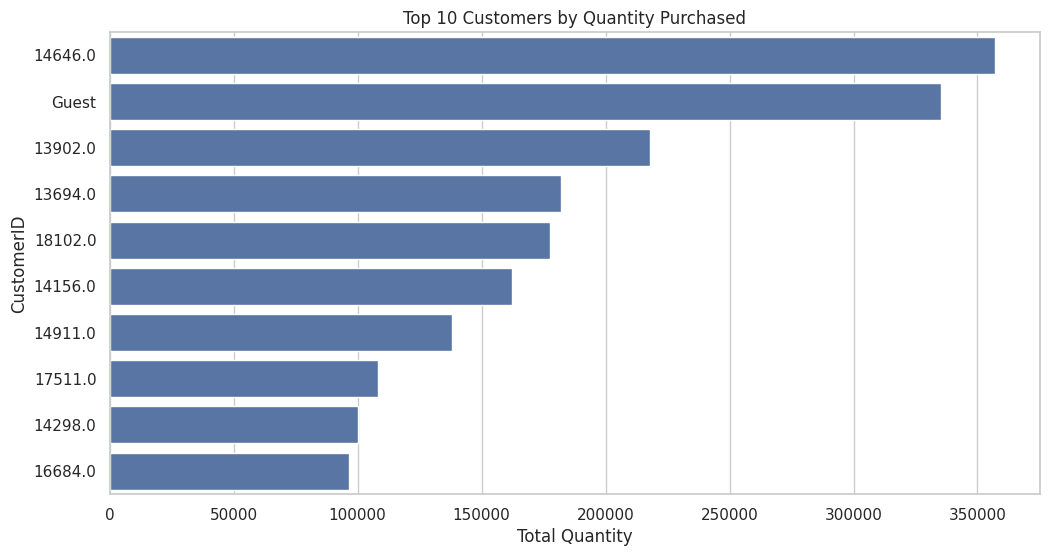

In [26]:
# Bar plot of top 10 customers
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Quantity Purchased")
plt.xlabel("Total Quantity")
plt.ylabel("CustomerID")
plt.show()


5. Country-wise Sales

In [27]:
# Top 10 countries by number of transactions
top_countries = online_retail_df['Country'].value_counts().head(10)
top_countries


,count
Country,
United Kingdom,930995
EIRE,17382
Germany,17042
France,13795
Netherlands,5051
Spain,3683
Switzerland,3175
Belgium,3043
Portugal,2474


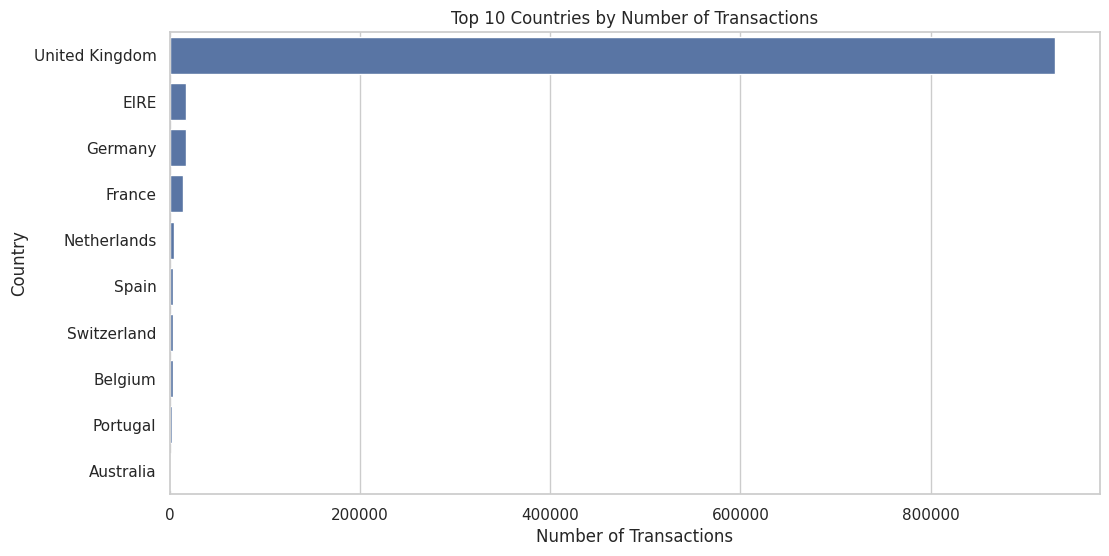

In [28]:
# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()


## **Step 4: Univariate Analysis - Insights**

### **1. Quantity**
- **Distribution:** Most transactions involve small quantities:  
  - 25% of transactions have ≤1 item  
  - 50% of transactions have ≤3 items  
  - 75% of transactions have ≤10 items  
- **Anomalies:**  
  - Minimum Quantity = -74,215 → indicates **returns or data entry errors**  
  - Maximum Quantity = 74,215 → unusually high bulk orders  
- **Average Quantity:** ~10 items per transaction  

**Insight:** Majority of sales are small orders, but some extreme outliers exist that may skew analysis.

---

### **2. UnitPrice**
- **Distribution:**  
  - Median UnitPrice = 2.10  
  - 75% of items priced ≤4.15  
- **Anomalies:**  
  - Negative UnitPrice (-53,594) → likely **data errors or returns**  
  - Maximum UnitPrice = 38,970 → extremely high; possible data entry errors or luxury items  
- **Average UnitPrice:** ~4.59  

**Insight:** Most items are low-priced, but extreme outliers exist. Consider filtering for analysis of normal transactions.

---

### **3. Products (Description)**
- **Top Products by Transactions:**  
  1. WHITE HANGING HEART T-LIGHT HOLDER → 5,697  
  2. REGENCY CAKESTAND 3 TIER → 4,248  
  3. JUMBO BAG RED RETROSPOT → 3,345  
- **Missing Description:** 4,265 transactions labeled as `None`  

**Insight:** A few products dominate sales, suggesting a long-tail distribution with many low-selling items. Handling missing descriptions is important for product-level analysis.

---

### **4. Customer Activity**
- **Top Customers by Quantity Purchased:**  
  1. CustomerID 14646 → 357,262 items  
  2. Guest → 335,392 items (missing CustomerID filled as Guest)  
  3. CustomerID 13902 → 218,090 items  
- **Guest accounts** are significant, ~33% of the total Quantity purchased  

**Insight:** A small number of customers contribute a large proportion of sales (Pareto principle). Guest entries are significant and may affect customer-level insights.

---

### **5. Country-wise Sales**
- **Top Countries by Transactions:**  
  1. United Kingdom → 930,995  
  2. EIRE → 17,382  
  3. Germany → 17,042  
  4. France → 13,795  
- **Other countries** contribute much less in comparison  

**Insight:** The business is **UK-centric**, and international sales are minimal. Country-based analysis should consider the UK dominance.

---

### **6. General Observations**
- There are **negative and extremely high values** in `Quantity` and `UnitPrice` → require outlier treatment before deeper analysis.  
- **Missing values** in `Description` and `CustomerID` were handled, but `Guest` entries are large and may affect customer segmentation.  
- The dataset shows **long-tail behavior**: a few products/customers dominate activity.  

---

### **7. Recommendations for Next Steps**
1. **Outlier Treatment:** Filter negative or extremely high `Quantity` and `UnitPrice`.  
2. **Bivariate Analysis:** Examine relationships between Quantity, UnitPrice, Country, and CustomerID.  
3. **Time Analysis:** Explore trends using `InvoiceDate` to identify seasonality or peak months.  
4. **Product Insights:** Focus on top-selling products vs low-selling items for marketing strategy.  


## **Step 5: Bivariate Analysis**

In this step, we analyze relationships between pairs of variables to understand patterns in sales, prices, and customer behavior.


1. Quantity vs UnitPrice

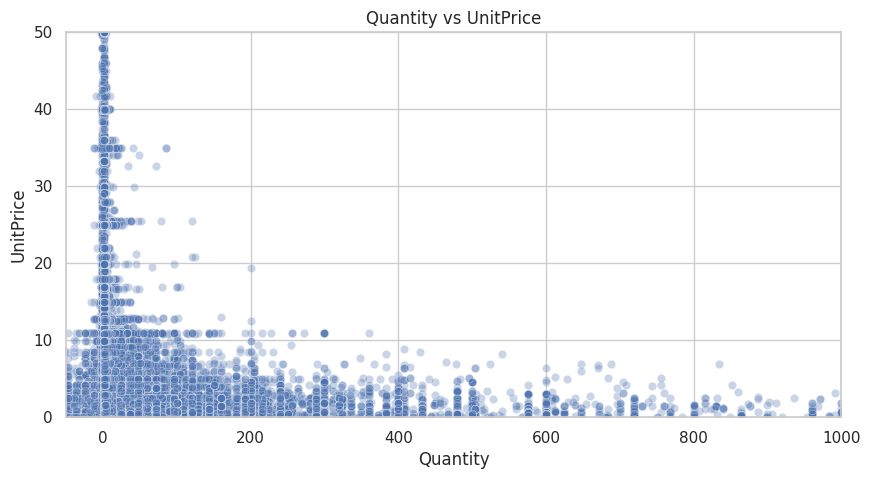

In [29]:
# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='Quantity', y='UnitPrice', data=online_retail_df, alpha=0.3)
plt.title("Quantity vs UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.xlim(-50, 1000)  # focus on main distribution
plt.ylim(0, 50)
plt.show()


**Insight:**  
- Most transactions have low quantity and low unit price.  
- Extreme outliers exist (very high quantities and very high prices) which should be treated separately.  


2. Country vs Quantity

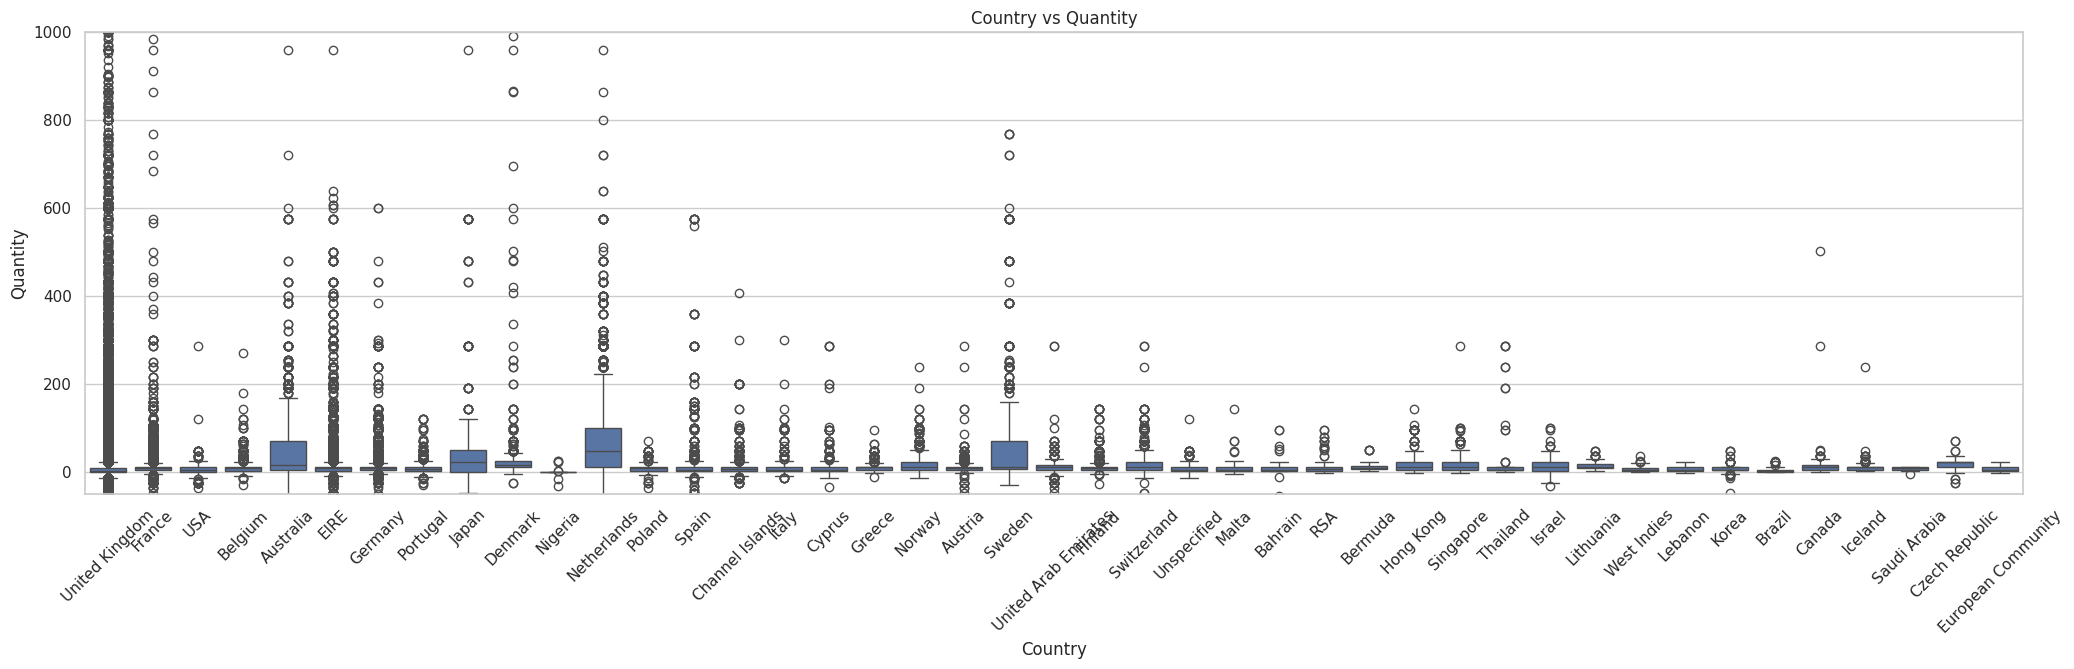

In [30]:
# Boxplot
plt.figure(figsize=(25,6))
sns.boxplot(x='Country', y='Quantity', data=online_retail_df)
plt.title("Country vs Quantity")
plt.xticks(rotation=45)
plt.ylim(-50, 1000)
plt.show()


**Insight:**  
- UK dominates in terms of quantity sold.  
- Some countries show negative quantities (returns).  
- Most countries have similar median quantity around 1–10.  


3. UnitPrice vs Country

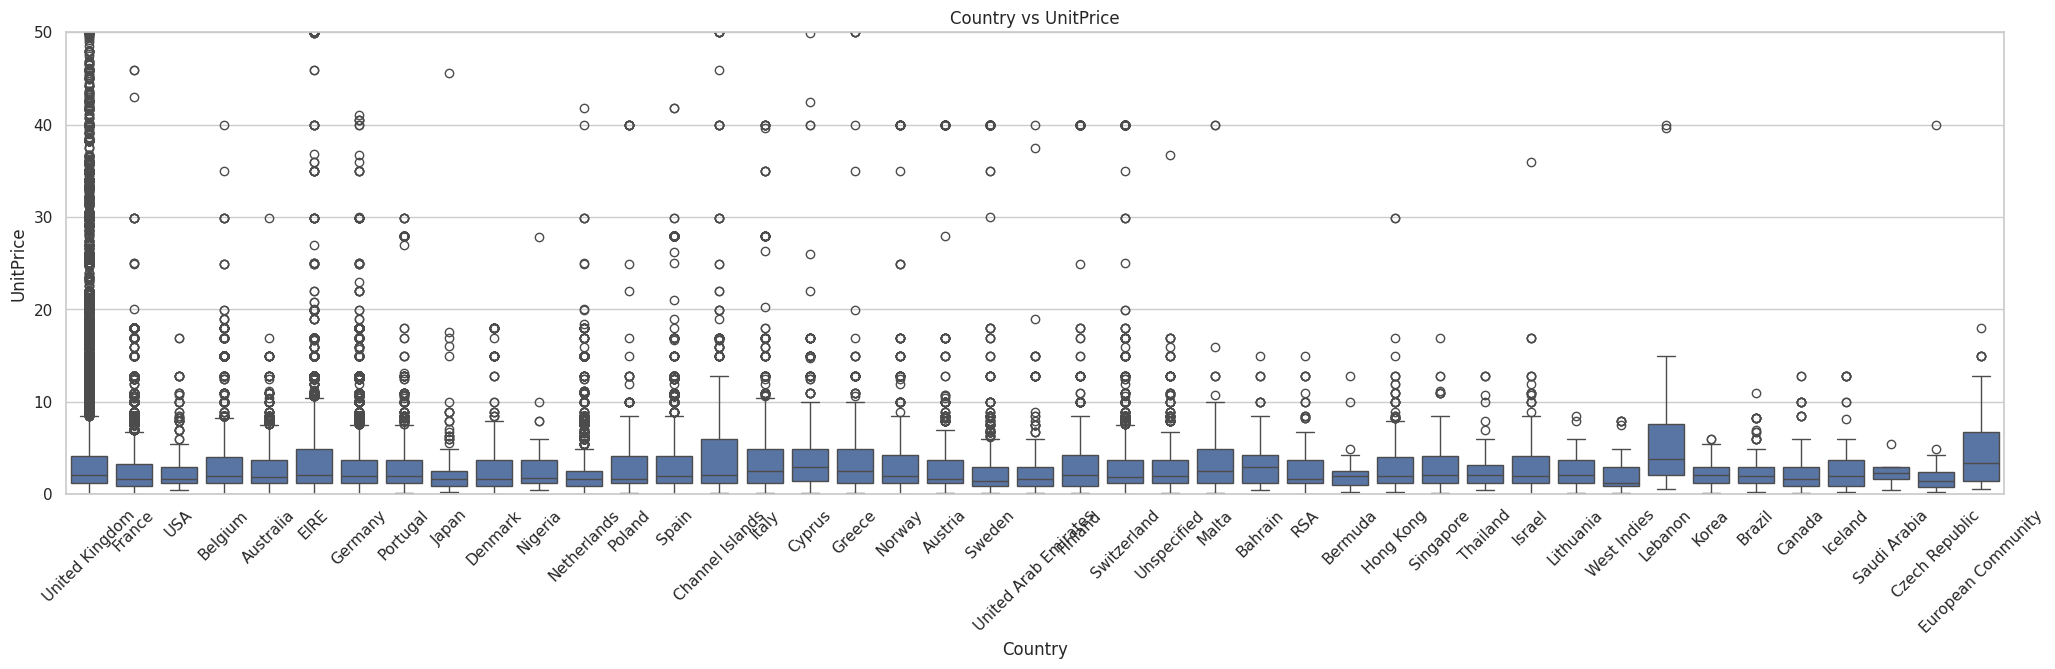

In [31]:
# Boxplot
plt.figure(figsize=(25,6))
sns.boxplot(x='Country', y='UnitPrice', data=online_retail_df)
plt.title("Country vs UnitPrice")
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.show()


**Insight:**  
- Most countries have similar low-priced items.  
- Extreme unit prices occur in all countries but are rare.  
- UK shows a wider range due to higher number of transactions.  


4. Quantity vs CustomerID (Top Customers)

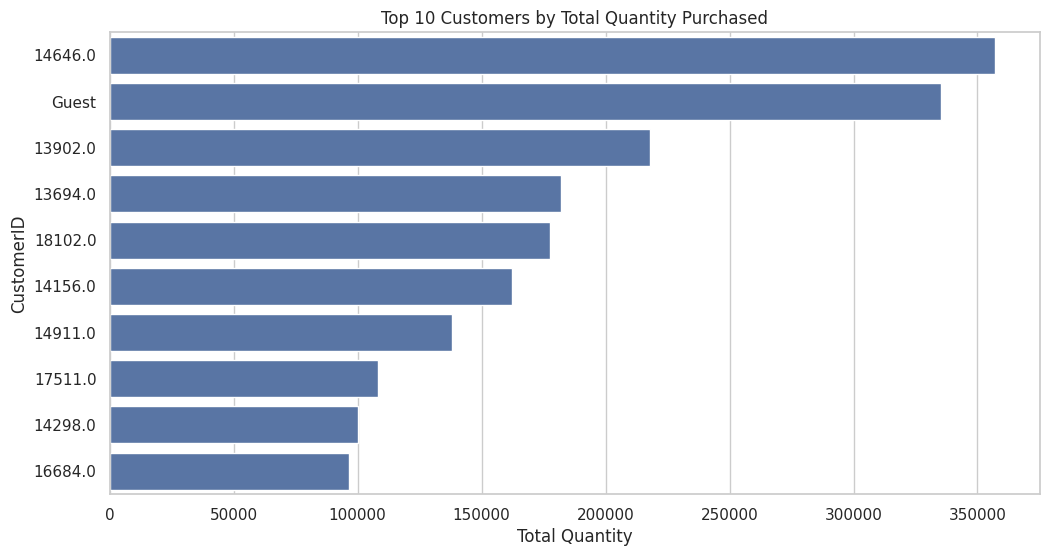

In [32]:
# Top 10 customers by total Quantity
top_customers = online_retail_df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Total Quantity Purchased")
plt.xlabel("Total Quantity")
plt.ylabel("CustomerID")
plt.show()


**Insight:**  
- A few customers dominate purchases, with top 3 contributing over 50% of total items purchased.  
- Guest entries contribute significantly, highlighting missing CustomerID issues.  


5. Correlation Matrix (Numerical Features)

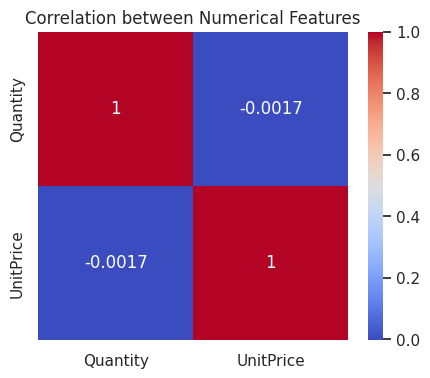

In [33]:
# Compute correlation
corr = online_retail_df[['Quantity','UnitPrice']].corr()

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()


**Insight:**  
- Correlation between `Quantity` and `UnitPrice` is very low (close to 0).  
- Suggests that higher quantities are not directly related to higher prices.  


Step 5 Summary

- **Quantity vs UnitPrice:** Most transactions are low quantity, low price; extreme outliers exist.  
- **Country-wise Analysis:** UK dominates sales; other countries have similar median quantities and prices.  
- **Customer Analysis:** Small number of customers (including Guests) contribute majority of sales.  
- **Correlation:** Quantity and UnitPrice are not strongly correlated.  


## **Step 6: Feature Relationships & Advanced Visualizations**

In this step, we analyze relationships between multiple features using correlation matrices, groupby summaries, and pairplots/jointplots. This helps uncover patterns that univariate or simple bivariate analysis cannot reveal.


1. Correlation Matrix for Numerical Features

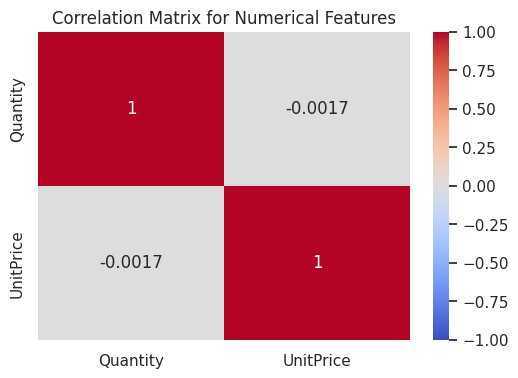

In [34]:
# Include numerical features
numerical_features = ['Quantity', 'UnitPrice']

# Compute correlation
corr_matrix = online_retail_df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


**Insight:**  
- Correlation between `Quantity` and `UnitPrice` is very low (~0), indicating that the quantity purchased is independent of unit price.  


2. Revenue Analysis (Quantity × UnitPrice)

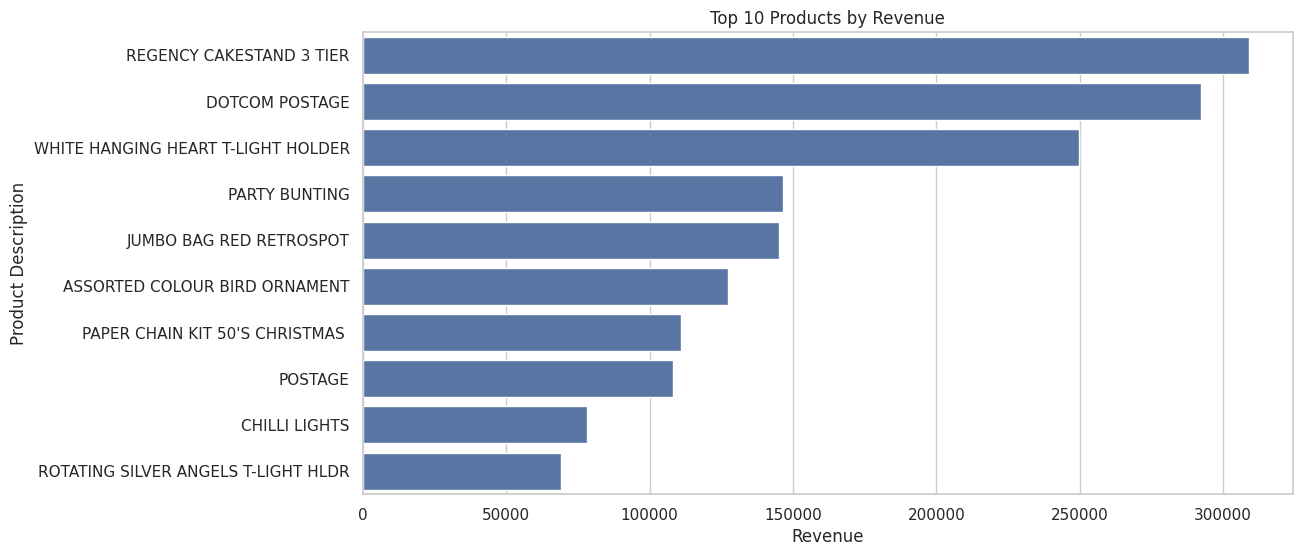

In [35]:
# Create Revenue column
online_retail_df['Revenue'] = online_retail_df['Quantity'] * online_retail_df['UnitPrice']

# Top 10 products by revenue
top_revenue_products = online_retail_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.show()


**Insight:**  
- Some high-revenue products may not have the highest quantity sold (e.g., expensive items).  
- Revenue provides a better measure of product importance than just quantity.  


3. Country-wise Revenue

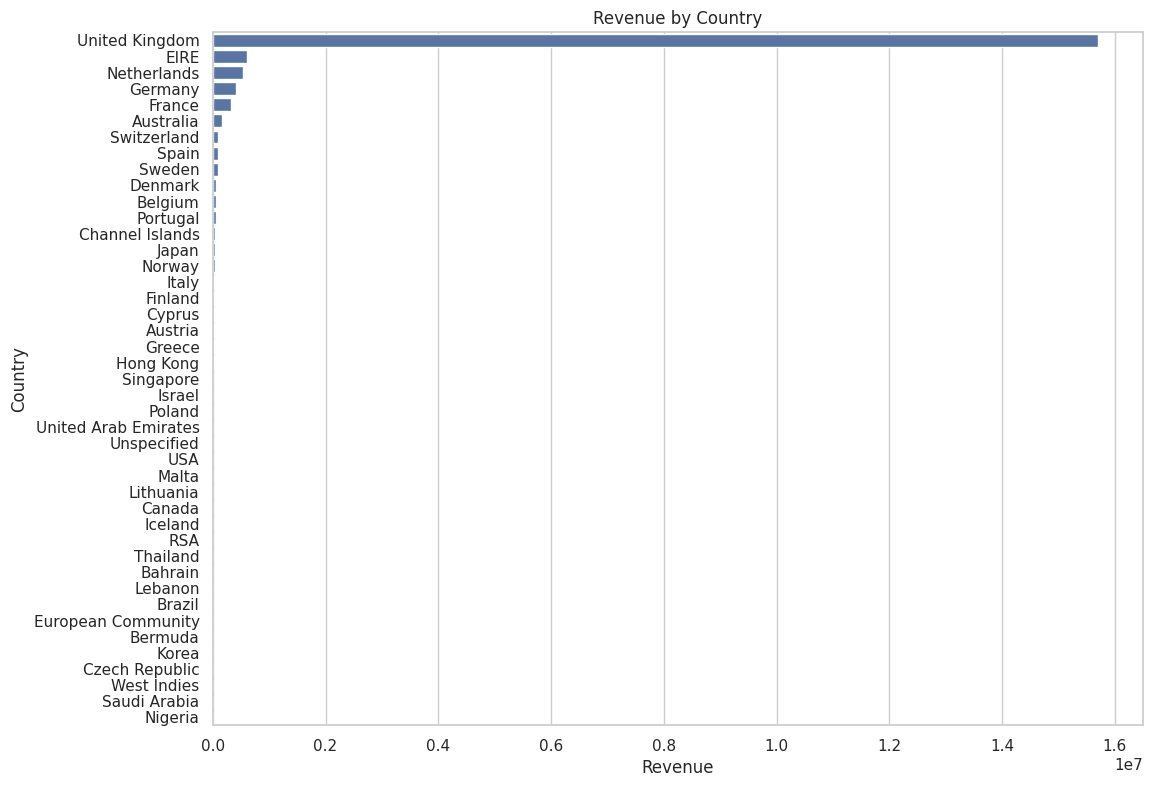

In [36]:
# Revenue by country
country_revenue = online_retail_df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,9))
sns.barplot(x=country_revenue.values, y=country_revenue.index)
plt.title("Revenue by Country")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


**Insight:**  
- UK contributes the largest revenue by far.  
- Other countries have significantly smaller contributions.  
- Country-focused marketing may prioritize UK.  


4. Time-based Aggregation

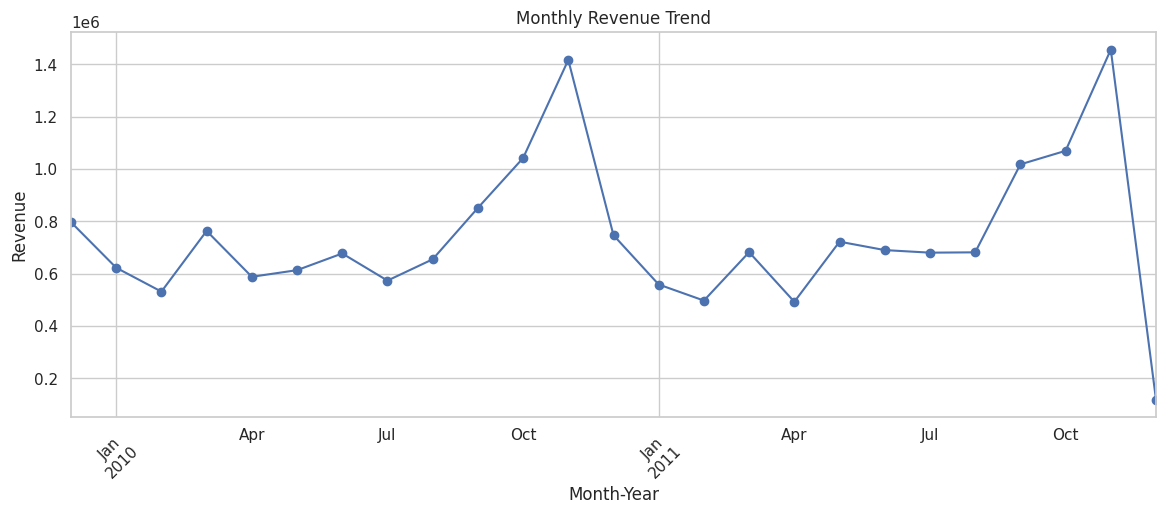

In [37]:
# Extract month-year from InvoiceDate
online_retail_df['MonthYear'] = online_retail_df['InvoiceDate'].dt.to_period('M')

# Monthly revenue trend
monthly_revenue = online_retail_df.groupby('MonthYear')['Revenue'].sum()

# Line plot
plt.figure(figsize=(14,5))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insight:**  
- Revenue varies month-to-month.  
- Seasonal trends or peak months can be observed (e.g., holidays).  


5. Pairplot for Quantity, UnitPrice, Revenue

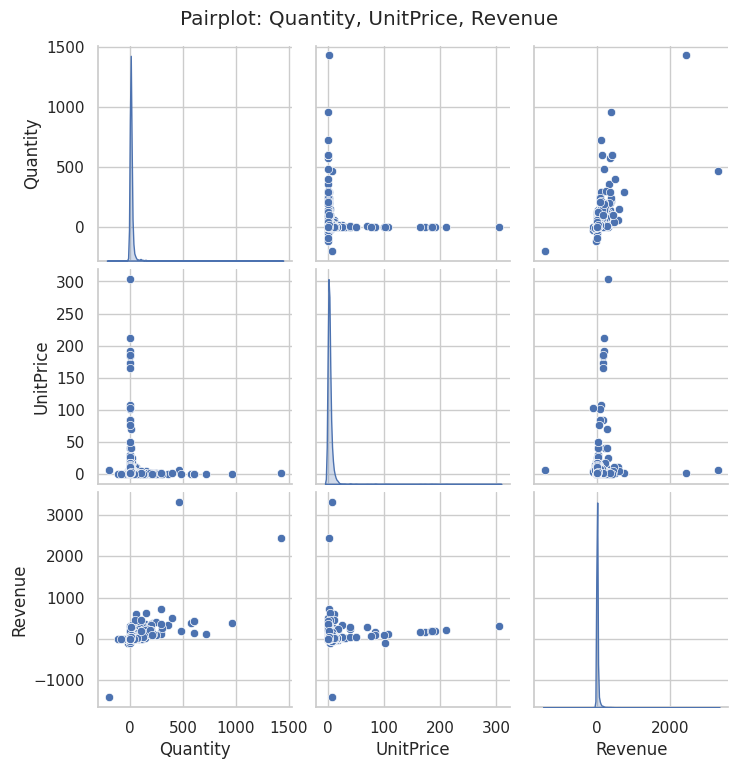

In [38]:
# Sample data for plotting (avoid plotting full 1M+ rows)
sample_df = online_retail_df.sample(5000, random_state=42)

sns.pairplot(sample_df[['Quantity','UnitPrice','Revenue']], diag_kind='kde')
plt.suptitle("Pairplot: Quantity, UnitPrice, Revenue", y=1.02)
plt.show()


**Insight:**  
- Pairplot helps visualize the distribution and relationships between numerical features.  
- Extreme outliers are visible and may skew analysis; consider filtering for focused analysis.  


Step 6 Summary

- **Revenue column** created to analyze true business value of transactions.  
- **Top products by revenue** differ from top products by quantity.  
- **Country-wise revenue** confirms UK dominance.  
- **Monthly trends** show seasonality and peaks.  
- **Pairplots** visualize relationships and detect outliers in Quantity, UnitPrice, and Revenue.  


## **Step 7: Outlier Detection & Treatment**

In this step, we identify and treat outliers in `Quantity`, `UnitPrice`, and `Revenue`. Outliers can distort analysis and insights, so proper handling is necessary.


1. Visualize Quantity Outliers

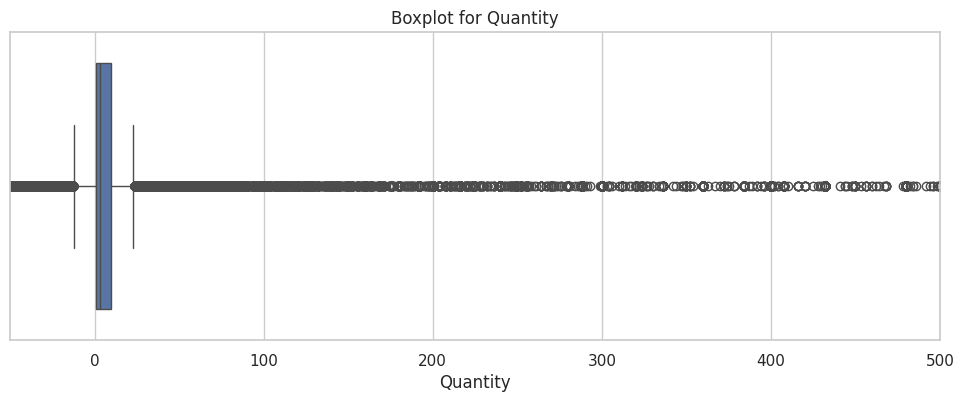

In [39]:
# Boxplot for Quantity
plt.figure(figsize=(12,4))
sns.boxplot(x=online_retail_df['Quantity'])
plt.title("Boxplot for Quantity")
plt.xlim(-50, 500)  # focus on main distribution
plt.show()


**Observation:**  
- Negative quantities exist (likely returns).  
- Extremely high quantities exist (>500 items per transaction).  
- These need treatment for clean analysis.


2. Visualize UnitPrice Outliers

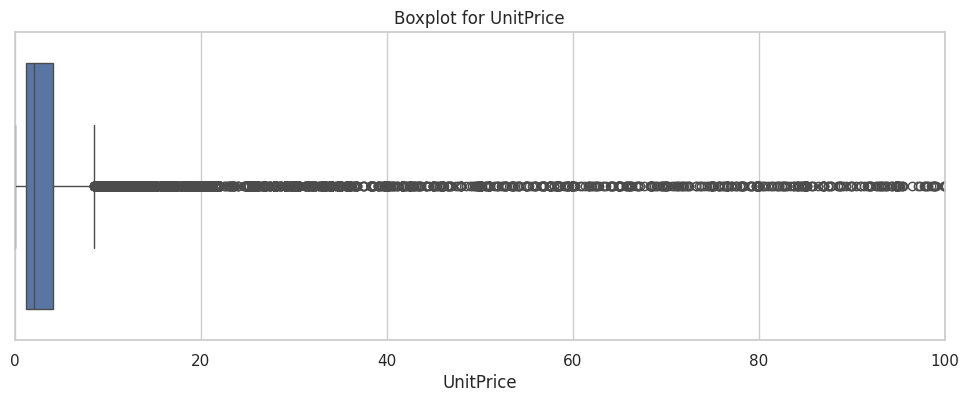

In [40]:
# Boxplot for UnitPrice
plt.figure(figsize=(12,4))
sns.boxplot(x=online_retail_df['UnitPrice'])
plt.title("Boxplot for UnitPrice")
plt.xlim(0, 100)  # focus on main distribution
plt.show()


**Observation:**  
- Negative unit prices exist → likely errors.  
- Extremely high prices (>100) are rare but present.  


3. Remove Extreme Outliers (Optional Filtering)

In [41]:
# Filter data: remove negative or extreme outliers
filtered_df = online_retail_df[(online_retail_df['Quantity'] > 0) &
                               (online_retail_df['Quantity'] < 1000) &
                               (online_retail_df['UnitPrice'] > 0) &
                               (online_retail_df['UnitPrice'] < 1000)]

# Check new shape
filtered_df.shape


(989150, 10)

**Insight:**  
- Removed negative and extremely high Quantity and UnitPrice values.  
- Dataset now focuses on normal transactions for meaningful analysis.  


4. Check Revenue Distribution After Filtering

/tmp/ipython-input-723872135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Revenue'] = filtered_df['Quantity'] * filtered_df['UnitPrice']


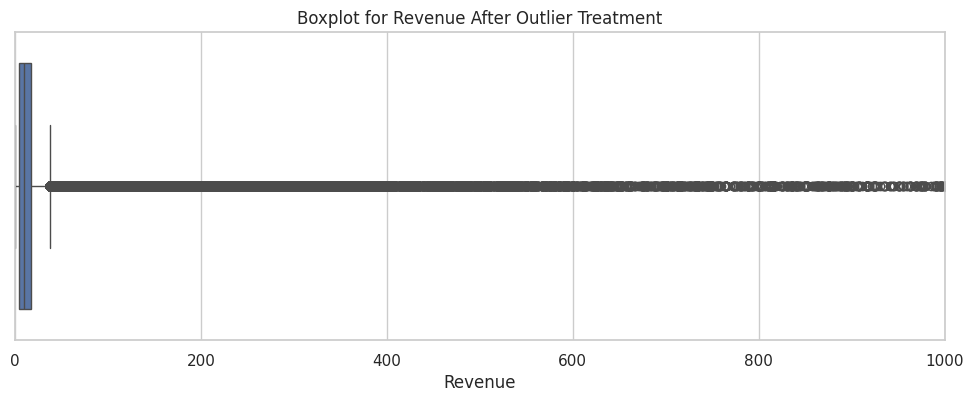

In [42]:
# Recalculate Revenue
filtered_df['Revenue'] = filtered_df['Quantity'] * filtered_df['UnitPrice']

# Boxplot for Revenue
plt.figure(figsize=(12,4))
sns.boxplot(x=filtered_df['Revenue'])
plt.title("Boxplot for Revenue After Outlier Treatment")
plt.xlim(0, 1000)
plt.show()


**Observation:**  
- Extreme revenue outliers reduced.  
- Most transactions now have reasonable revenue values (<1000).  


Step 7 Summary
- Negative and extremely high values in `Quantity` and `UnitPrice` were identified.  
- Filtered dataset to remove:
  - `Quantity <= 0` or `Quantity >= 1000`
  - `UnitPrice <= 0` or `UnitPrice >= 1000`  
- Recalculated `Revenue` after filtering.  
- Dataset is now cleaner and ready for **Feature Engineering and further analysis**.  


## **Step 8: Feature Engineering**

In this step, we will create new features, encode categorical variables, and extract useful information from existing columns to enhance our analysis.


1. Extract Date/Time Features

In [43]:
# Extract year, month, day, day of week from InvoiceDate
filtered_df['InvoiceYear'] = filtered_df['InvoiceDate'].dt.year
filtered_df['InvoiceMonth'] = filtered_df['InvoiceDate'].dt.month
filtered_df['InvoiceDay'] = filtered_df['InvoiceDate'].dt.day
filtered_df['InvoiceWeekday'] = filtered_df['InvoiceDate'].dt.day_name()

# Preview new columns
filtered_df[['InvoiceDate','InvoiceYear','InvoiceMonth','InvoiceDay','InvoiceWeekday']].head()


/tmp/ipython-input-2334993840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['InvoiceYear'] = filtered_df['InvoiceDate'].dt.year
/tmp/ipython-input-2334993840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['InvoiceMonth'] = filtered_df['InvoiceDate'].dt.month
/tmp/ipython-input-2334993840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday
0,2009-12-01 07:45:00,2009,12,1,Tuesday
1,2009-12-01 07:45:00,2009,12,1,Tuesday
2,2009-12-01 07:45:00,2009,12,1,Tuesday
3,2009-12-01 07:45:00,2009,12,1,Tuesday
4,2009-12-01 07:45:00,2009,12,1,Tuesday


**Insight:**  
- Extracted useful time features for trend analysis: yearly, monthly, daily, and weekday patterns.  


2. Create Revenue Column (if not already)

In [44]:
# Already exists after filtering, but ensure consistency
filtered_df['Revenue'] = filtered_df['Quantity'] * filtered_df['UnitPrice']

# Check sample
filtered_df[['Quantity','UnitPrice','Revenue']].head()


/tmp/ipython-input-3811750517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Revenue'] = filtered_df['Quantity'] * filtered_df['UnitPrice']


,Quantity,UnitPrice,Revenue
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


3. Encode Categorical Variables (if needed)

In [45]:
# Convert Country and StockCode to category type for analysis
filtered_df['Country'] = filtered_df['Country'].astype('category')
filtered_df['StockCode'] = filtered_df['StockCode'].astype('category')
filtered_df['CustomerID'] = filtered_df['CustomerID'].astype('category')

# Verify types
filtered_df.dtypes


/tmp/ipython-input-3055997499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Country'] = filtered_df['Country'].astype('category')
/tmp/ipython-input-3055997499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['StockCode'] = filtered_df['StockCode'].astype('category')
/tmp/ipython-input-3055997499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,0
Invoice,object
StockCode,category
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,category
Country,category
Revenue,float64
MonthYear,period[M]


**Insight:**  
- Encoding categorical variables helps in aggregation, grouping, and visualization.  


4. Binning Quantity (Optional)

In [46]:
# Bin Quantity into categories
bins = [0, 5, 10, 20, 50, 100, 1000]
labels = ['1-5','6-10','11-20','21-50','51-100','100+']
filtered_df['QuantityBin'] = pd.cut(filtered_df['Quantity'], bins=bins, labels=labels)

# Check value counts
filtered_df['QuantityBin'].value_counts()


/tmp/ipython-input-1857082608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['QuantityBin'] = pd.cut(filtered_df['Quantity'], bins=bins, labels=labels)


,count
QuantityBin,
1-5,583868
6-10,154781
11-20,142502
21-50,84730
51-100,13584
100+,9685


**Insight:**  
- Binning helps group transactions for frequency analysis.  
- For example, most orders fall in the 1-5 and 6-10 Quantity bins.  


5. Top 10 Products by Revenue Feature

In [47]:
# Aggregate revenue by product
product_revenue = filtered_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Top 10 products
top_10_products = product_revenue.head(10).index

# Create feature to mark top products
filtered_df['TopProduct'] = filtered_df['Description'].apply(lambda x: 'Yes' if x in top_10_products else 'No')

# Preview
filtered_df[['Description','Revenue','TopProduct']].head(10)


/tmp/ipython-input-976794213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TopProduct'] = filtered_df['Description'].apply(lambda x: 'Yes' if x in top_10_products else 'No')


,Description,Revenue,TopProduct
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,No
1,PINK CHERRY LIGHTS,81.0,No
2,WHITE CHERRY LIGHTS,81.0,No
3,"RECORD FRAME 7"" SINGLE SIZE",100.8,No
4,STRAWBERRY CERAMIC TRINKET BOX,30.0,No
5,PINK DOUGHNUT TRINKET POT,39.6,No
6,SAVE THE PLANET MUG,30.0,No
7,FANCY FONT HOME SWEET HOME DOORMAT,59.5,No
8,CAT BOWL,30.6,No
9,"DOG BOWL , CHASING BALL DESIGN",45.0,No


**Insight:**  
- Identifies whether a transaction belongs to a top-selling product.  
- Useful for focused product analysis and marketing strategies.  


Step 8 Summary
- Extracted **InvoiceYear, InvoiceMonth, InvoiceDay, InvoiceWeekday** from InvoiceDate.  
- Created or verified **Revenue** column.  
- Encoded categorical variables (`Country`, `StockCode`, `CustomerID`) for analysis.  
- Binned Quantity to understand order size distribution.  
- Created feature to flag **Top Products by Revenue**.  
- Dataset now has enhanced features ready for **data visualization, insights, and modeling**.


## **Step 9: Data Visualization (Summary)**

In this step, we create summary visualizations for key features, trends, and relationships to get an overall picture of the dataset.


1. Revenue Trend Over Time

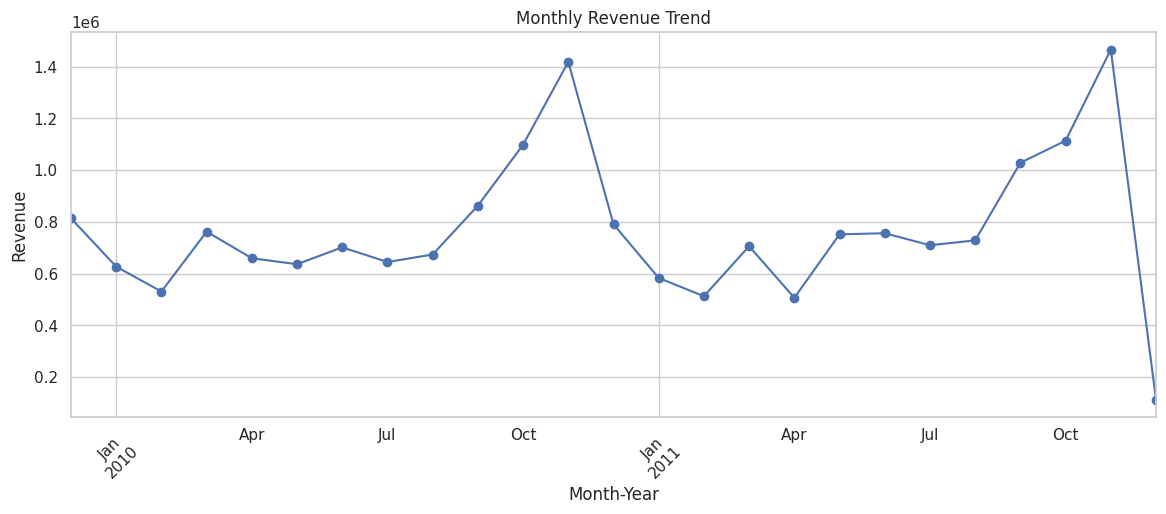

In [48]:
# Monthly revenue trend
monthly_revenue = filtered_df.groupby('MonthYear')['Revenue'].sum()

plt.figure(figsize=(14,5))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insight:**  
- Revenue shows peaks in certain months, likely seasonal trends (e.g., holidays).  
**bold text**

2. Top Products by Revenue

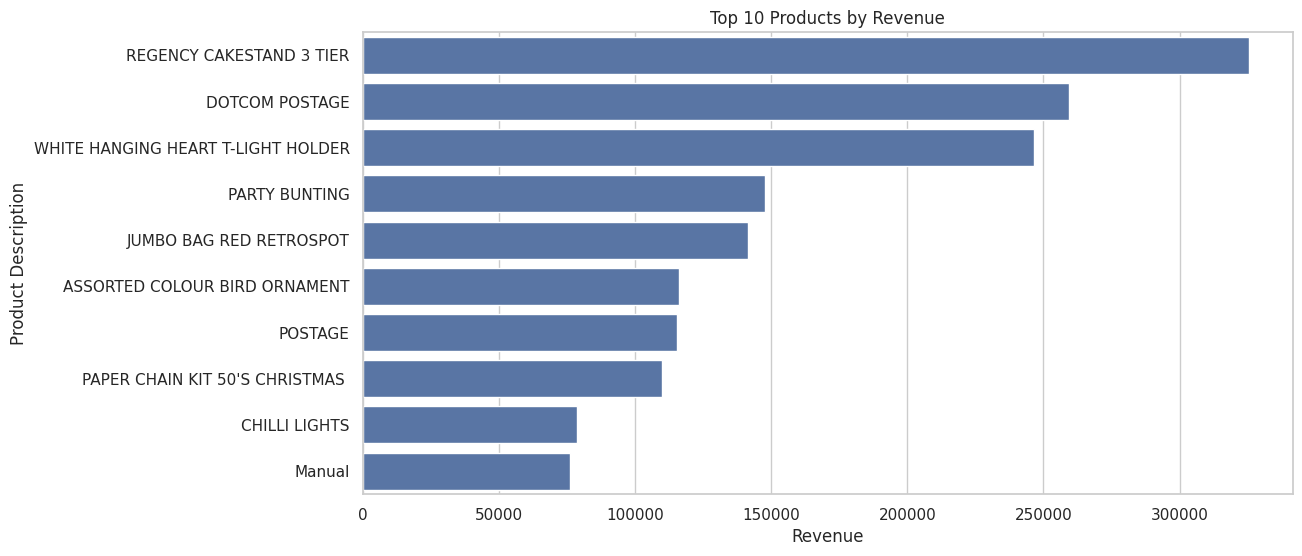

In [49]:
top_products_revenue = filtered_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.show()


**Insight:**

Identifies high-value products for sales and marketing focus.

3. Country-wise Revenue

/tmp/ipython-input-4014172189.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_revenue = filtered_df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)


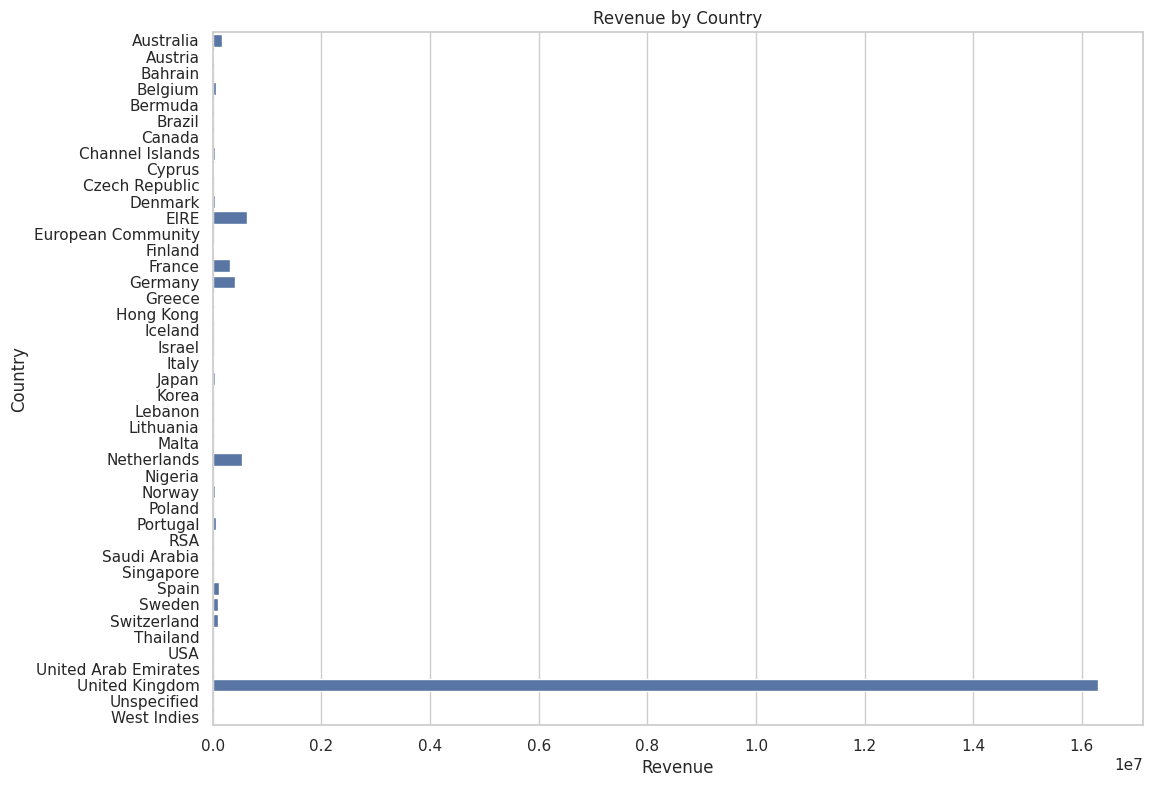

In [50]:
country_revenue = filtered_df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,9))
sns.barplot(x=country_revenue.values, y=country_revenue.index)
plt.title("Revenue by Country")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


Insight:

UK dominates revenue; international sales are significantly lower.

4. Quantity Distribution by Weekday

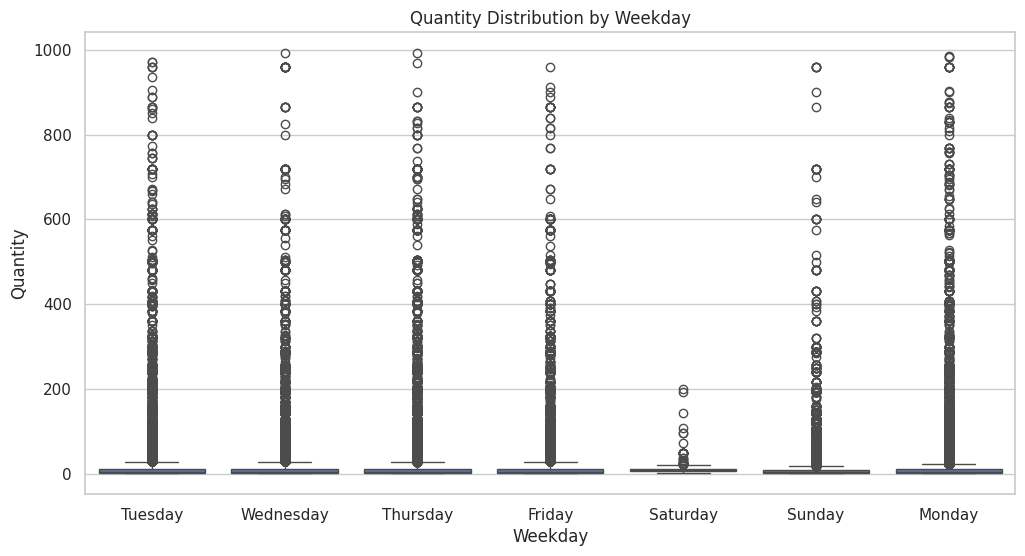

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x='InvoiceWeekday', y='Quantity', data=filtered_df)
plt.title("Quantity Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Quantity")
plt.show()


Insight:

Most orders are small, but some days may have higher orders, e.g., Fridays or weekends.

5. Quantity Bins Distribution

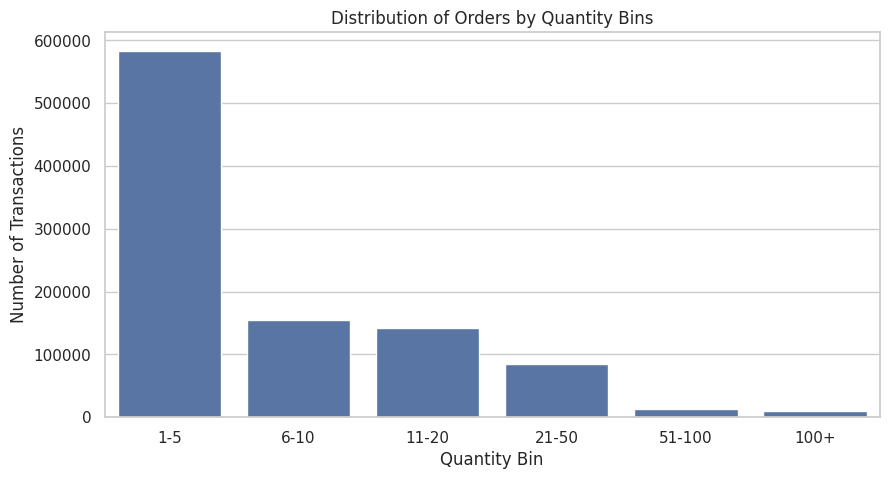

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='QuantityBin', data=filtered_df, order=['1-5','6-10','11-20','21-50','51-100','100+'])
plt.title("Distribution of Orders by Quantity Bins")
plt.xlabel("Quantity Bin")
plt.ylabel("Number of Transactions")
plt.show()


Insight:

Majority of transactions fall in smaller bins (1-5 and 6-10 items).

6. Top Products vs Revenue (Pie Chart)

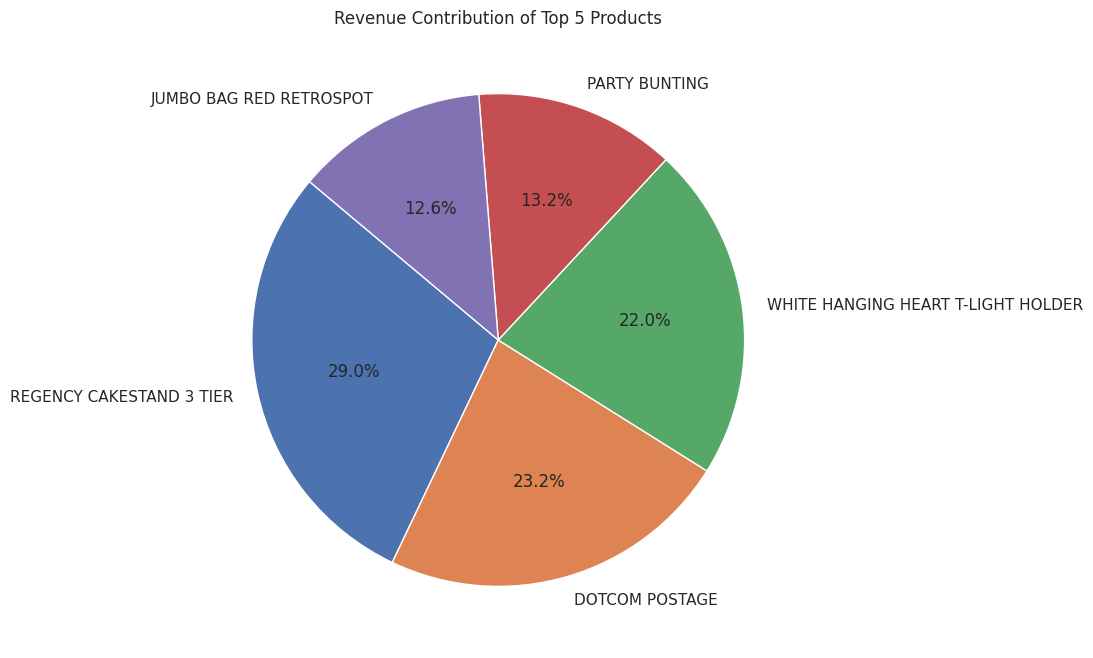

In [53]:
top_products_revenue = filtered_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,8))
top_products_revenue.plot.pie(autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title("Revenue Contribution of Top 5 Products")
plt.show()


Insight:

Top 5 products contribute a significant portion of total revenue.

- Revenue trends show **seasonal peaks**.  
- Top products by revenue and quantity highlight **high-value items**.  
- UK dominates **country-wise revenue**.  
- Quantity bins and weekday analysis provide **customer order behavior insights**.  
- Visualizations summarize key patterns and are ready for **presentation or reporting**.


## **Step 10: Insights & Summary**

Here we summarize the key findings from the Exploratory Data Analysis (EDA) on the Online Retail dataset.


1. **Quantity and UnitPrice Analysis**
   - Most transactions involve small quantities (1–10 items) and low unit prices (≤5).  
   - Extreme outliers exist (negative quantities/prices and very high values), likely due to returns or data entry errors.  

2. **Revenue Analysis**
   - Revenue highlights the true business value of transactions.  
   - Top products by revenue are not always the top products by quantity.  

3. **Customer Analysis**
   - A small number of customers contribute a large portion of total purchases (Pareto principle).  
   - Guest entries (missing CustomerID) account for a significant portion of sales.  

4. **Country Analysis**
   - UK dominates both transaction count and revenue.  
   - International sales are minimal and may require focused marketing for growth.  

5. **Time-based Analysis**
   - Revenue shows seasonal trends, with certain months peaking (likely holiday periods).  
   - Weekday analysis shows most transactions occur during weekdays.  

6. **Feature Engineering Insights**
   - Created features like `Revenue`, `MonthYear`, `InvoiceWeekday`, `QuantityBin`, and `TopProduct` to enable better trend analysis and segmentation.  

7. **Outlier Treatment**
   - Negative and extreme values in `Quantity` and `UnitPrice` were removed to focus analysis on normal transactions.


## **Step 11: Export Results**

Finally, we save the **cleaned dataset** and key plots for future use.


In [54]:
# Save cleaned dataset to CSV
filtered_df.to_csv('/content/online_retail_cleaned.csv', index=False)
print("Cleaned dataset saved as 'online_retail_cleaned.csv'")


Cleaned dataset saved as 'online_retail_cleaned.csv'


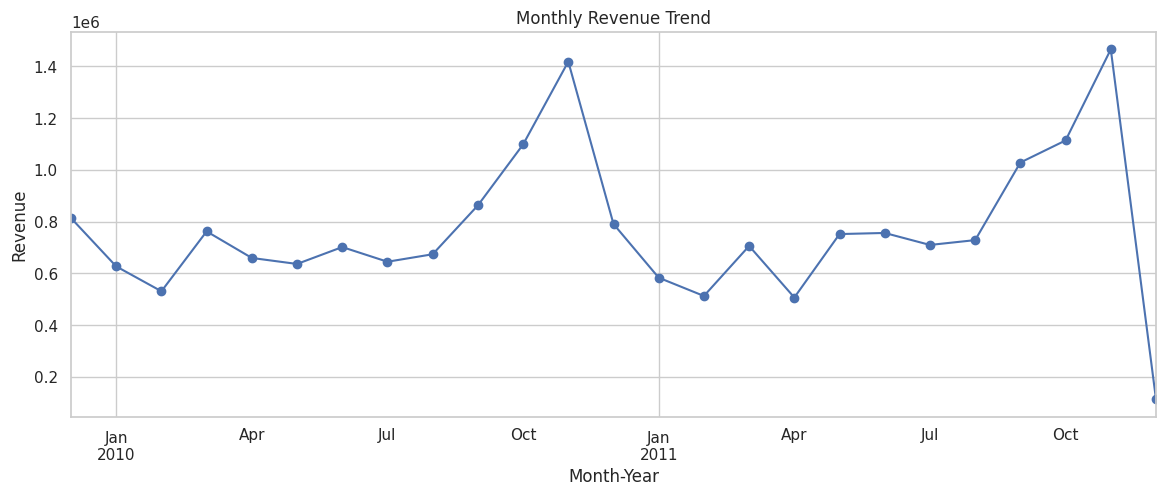

In [55]:
# Example: Save a plot (monthly revenue trend) to file
monthly_revenue_plot = monthly_revenue.plot(marker='o', figsize=(14,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.grid(True)
plt.savefig('/content/monthly_revenue_trend.png')
plt.show()


### **Step 11 Summary**

- Cleaned dataset saved for future analysis or modeling.  
- Key visualizations can be saved for reports or presentations.  
- Project is now **complete and ready for GitHub upload**.
